In [1]:
### install, import, download


!pip install mlxtend

import pandas as pd                                             #for dataframe operations
import numpy as np                                              #for array operations

import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#mlxtend : machine learning extensions

import random
import matplotlib.pyplot as plt                                 ## it shows immediatly after matplot lib if not we have to do plt.show()
%matplotlib inline 


import networkx as nx

from sklearn.neighbors import KNeighborsClassifier              # kNN classifier
from sklearn.neighbors import KNeighborsRegressor               # kNN regressor
from sklearn.model_selection import GridSearchCV                # Grid search with CV
from sklearn.metrics import confusion_matrix,mean_squared_error,adjusted_rand_score,accuracy_score # Error Metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler   # To Scale the data
from sklearn.model_selection import train_test_split, GridSearchCV          # To split the data

from sklearn.cluster import KMeans,AgglomerativeClustering 

from scipy.cluster.hierarchy import linkage, dendrogram

#from imblea import CondensedNearestNeighbour                    # Implementation based on Hart's condensed knn

#### Install surprise package

#!pip install scikit-surprise
#!pip install surprise
#! conda install -c conda-forge scikit-surprise
#from surprise import BaselineOnly

#from surprise import BaselineOnly
#from surprise import Dataset
#from surprise import Reader, KNNWithMeans
#from surprise.model_selection import cross_validate
#from collections import defaultdict
#from itertools import islice

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

!pip install xgboost

from sklearn.svm import SVC

import statsmodels.formula.api as sm                           #logistic regression
from scipy.stats import mode

!pip install graphviz
import graphviz
import seaborn
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn import tree

!pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


import pandas_profiling as pp

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False,world_readable=True)

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import cross_validate

  Using cached https://files.pythonhosted.org/packages/96/84/4e2cae6247f397f83d8adc5c2a2a0c5d7d790a14a4c7400ff6574586f589/xgboost-0.90.tar.gz


ERROR: Files/directories not found in C:\Users\DRJHAN~1.SSV\AppData\Local\Temp\pip-install-bzfl3nmv\xgboost\pip-egg-info


In [87]:
train_dt = pd.read_csv("train.csv",delimiter=",")

In [88]:
train_dt.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [89]:
test_dt = pd.read_csv("test.csv",delimiter=",")

In [90]:
test_dt.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [80]:
train_dt.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [91]:
train_dt.shape

(550068, 12)

In [92]:
test_dt.shape

(233599, 11)

In [93]:
train_dt.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [95]:
test_dt.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [96]:
train_dt.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [97]:
pp.ProfileReport(train_dt)

Number of variables,12
Number of observations,550068
Total Missing (%),8.4%
Total size in memory,39.9 MiB
Average record size in memory,76.0 B
Numeric,6
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## Basic understanding from the data and steps o be done: 

1. There are 12 attributes out of which test data type conversion has to be done.

2. Check for missing values.

3. Check the outliers.

4. Check the correlations between attributes if possible.

5. Check the unique values and their total count.

6. 

In [98]:
train_dt.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [99]:
colnames = ['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category','Stay_In_Current_City_Years']

In [100]:
for col in colnames:
    train_dt[col]=train_dt[col].astype("category")

In [101]:
train_dt.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Product_Category_3             float64
Purchase                         int64
dtype: object

In [105]:
train_dt.isna().sum()/(train_dt.shape[0])*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

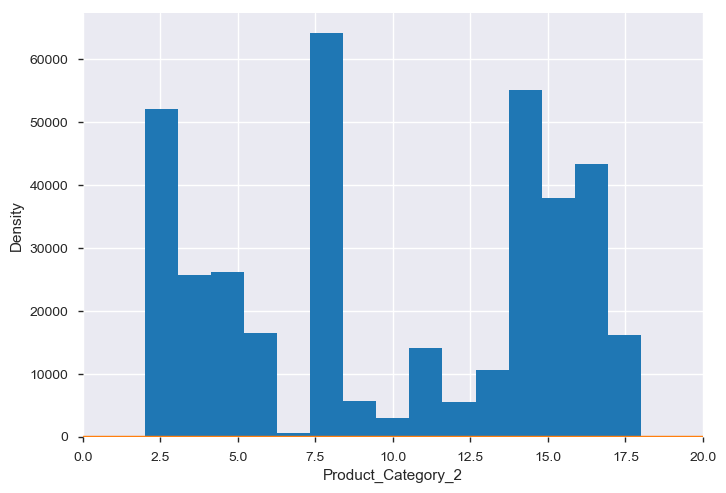

In [108]:
ax=train_dt["Product_Category_2"].hist(bins=15)
train_dt["Product_Category_2"].plot(kind='density')
ax.set(xlabel="Product_Category_2")
plt.xlim(0,20)
plt.show

since the data is randomly distributed, its better to impute missing values with the mean

In [109]:
train_dt["Product_Category_2"].mean(skipna=True)

9.842329251122386

In [110]:
train_dt["Product_Category_2"].median(skipna=True)

9.0

In [115]:
train_dt["Product_Category_2"].fillna(train_dt["Product_Category_2"].idxmax(),inplace=True)

In [113]:
train_dt["Product_Category_3"].fillna(train_dt["Product_Category_3"].idxmax(),inplace=True)

In [116]:
train_dt.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [120]:
train_dt.drop(["User_ID","Product_ID"],axis=1,inplace=True)

In [121]:
test_dt.drop(["User_ID","Product_ID"],axis=1,inplace=True)

In [124]:
test_dt.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [123]:
test_dt["Product_Category_2"].fillna(train_dt["Product_Category_2"].idxmax(),inplace=True)
test_dt["Product_Category_3"].fillna(train_dt["Product_Category_3"].idxmax(),inplace=True)

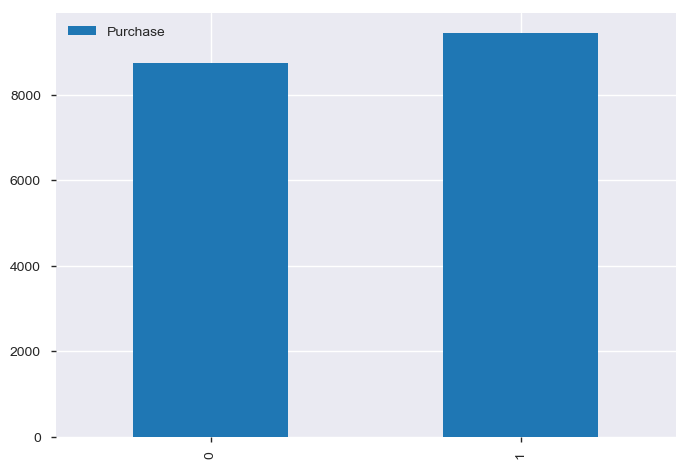

In [138]:
train_dt.groupby('Gender', as_index=False)["Purchase"].mean().plot(kind="bar")


,Age,Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


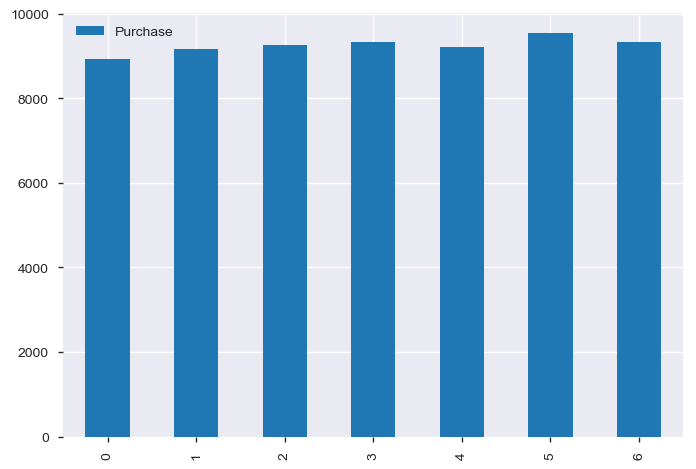

In [137]:
train_dt.groupby('Age', as_index=False)["Purchase"].mean().plot(kind="bar")

train_dt.groupby('Age', as_index=False)["Purchase"].mean()


In [140]:
train_dt.groupby('Occupation', as_index=False)["Purchase"].mean()

,Occupation,Purchase
0,0,9124.428588
1,1,8953.193270
2,2,8952.481683
3,3,9178.593088
4,4,9213.980251
5,5,9333.149298
6,6,9256.535691
7,7,9425.728223
8,8,9532.592497
9,9,8637.743761


In [1]:
train_dt.groupby('City_Category', as_index=False)["Purchase"].mean()


NameError: name 'train_dt' is not defined

Here we can see that the category "C" in city _category have more purchase frequency

In [143]:
train_dt.groupby('Stay_In_Current_City_Years', as_index=True)["Purchase"].mean()

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

In [147]:
train_dt.groupby("Marital_Status")["Purchase"].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [148]:
train_dt.groupby("Product_Category_1")["Purchase"].mean()

Product_Category_1
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64

In [149]:
X=train_dt.copy().drop(["Purchase"],axis=1)
y=train_dt["Purchase"]

In [151]:
X.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [159]:
le = LabelEncoder()


In [160]:
X=X.apply(le.fit_transform)

In [185]:
X1 = test_dt.apply(le.fit_transform)

In [186]:
X1.dtypes 

Gender                        int32
Age                           int32
Occupation                    int32
City_Category                 int32
Stay_In_Current_City_Years    int32
Marital_Status                int32
Product_Category_1            int32
Product_Category_2            int32
Product_Category_3            int32
dtype: object

In [162]:
X.dtypes

Gender                        int32
Age                           int32
Occupation                    int32
City_Category                 int32
Stay_In_Current_City_Years    int32
Marital_Status                int32
Product_Category_1            int32
Product_Category_2            int32
Product_Category_3            int32
dtype: object

In [163]:
ss = StandardScaler()

In [164]:
Xs = ss.fit_transform(X)

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning:

Data with input dtype int32 were all converted to float64 by StandardScaler.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int32 were all converted to float64 by StandardScaler.



In [187]:
Xs1 = ss.fit_transform(X1)

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning:

Data with input dtype int32 were all converted to float64 by StandardScaler.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int32 were all converted to float64 by StandardScaler.



In [188]:
Xs1

array([[ 0.57357536,  1.11231638, -0.16644456, ..., -1.14457076,
         0.64228547, -0.59770151],
       [ 0.57357536, -0.3684795 ,  1.36703141, ..., -0.60929217,
        -0.43375685, -0.59770151],
       [-1.74345008,  0.37191844, -1.08653014, ..., -0.07401358,
         1.18030663, -0.59770151],
       ...,
       [-1.74345008, -0.3684795 ,  1.06033621, ..., -1.14457076,
        -0.43375685,  1.2048893 ],
       [-1.74345008,  1.11231638, -1.08653014, ...,  1.2641829 ,
         1.5389874 , -0.59770151],
       [-1.74345008,  1.11231638, -1.23987774, ..., -0.34165288,
        -0.43375685, -0.59770151]])

In [165]:
Xs

array([[-1.74651251, -1.84424754,  0.29486356, ..., -0.61080871,
        -0.79080254,  0.5281361 ],
       [-1.74651251, -1.84424754,  0.29486356, ..., -1.11891197,
        -1.12496246, -0.87905823],
       [-1.74651251, -1.84424754,  0.29486356, ...,  1.67565594,
         1.04707698,  0.5281361 ],
       ...,
       [-1.74651251, -0.36673935,  1.06142262, ...,  3.70806897,
         1.04707698,  0.5281361 ],
       [-1.74651251,  2.58827703, -1.08494277, ...,  3.70806897,
         1.04707698,  0.5281361 ],
       [-1.74651251,  1.11076884, -1.23825458, ...,  3.70806897,
         1.04707698,  0.5281361 ]])

In [167]:
from sklearn.decomposition import PCA

In [168]:
pca = PCA(5)

In [169]:
principle_component = pca.fit_transform(X)

In [189]:
principle_component_1 = pca.fit_transform(X1)

In [190]:
pca.explained_variance_ratio_

array([0.36388647, 0.26842512, 0.23945352, 0.09015783, 0.01571596])

In [175]:
pcdf = pd.DataFrame(data=principle_component,columns=["component 1","component 2","component 3","component 4","component 5"])

In [191]:
pcdf_1 = pd.DataFrame(data=principle_component_1,columns=["component 1","component 2","component 3","component 4","component 5"])

In [176]:
from sklearn.model_selection import KFold
kf = KFold(20)

In [178]:
for a,b in kf.split(pcdf):
    X_train, X_test = Xs[a],Xs[b]
    y_train, y_test = y[a],y[b]

In [192]:
for a,b in kf.split(pcdf_1):
    X_train, X_test = Xs[a],Xs[b]
    y_train, y_test = y[a],y[b]

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [180]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [181]:
fit1 = lr.fit(X_train,y_train)
fit2 = dtr.fit(X_train,y_train)
fit3 = rfr.fit(X_train,y_train)
fit4 = gbr.fit(X_train,y_train)

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [182]:
print("Accuracy Score of Linear regression on train set",fit1.score(X_train,y_train)*100)
print("Accuracy Score of Decision Tree on train set",fit2.score(X_train,y_train)*100)
print("Accuracy Score of Random Forests on train set",fit3.score(X_train,y_train)*100)
print("Accuracy Score of Gradient Boosting on train set",fit4.score(X_train,y_train)*100)

Accuracy Score of Linear regression on train set 12.7614900487665
Accuracy Score of Decision Tree on train set 78.89783209131899
Accuracy Score of Random Forests on train set 77.18486826306638
Accuracy Score of Gradient Boosting on train set 63.89480998287201


In [183]:
print("Accuracy Score of Linear regression on test set",fit1.score(X_test,y_test)*100)
print("Accuracy Score of Decision Tree on test set",fit2.score(X_test,y_test)*100)
print("Accuracy Score of Random Forests on test set",fit3.score(X_test,y_test)*100)
print("Accuracy Score of Gradient Boosting on testset",fit4.score(X_test,y_test)*100)

Accuracy Score of Linear regression on test set 32.98513836088372
Accuracy Score of Decision Tree on test set 66.58228184878297
Accuracy Score of Random Forests on test set 70.43904423046372
Accuracy Score of Gradient Boosting on testset 71.10974344845644


now part 2